In [18]:
import pandas as pd
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../data/basic_data.csv')

In [4]:
data

,date,stock,closePrice
0,0,0,60.17
1,1,0,59.99
2,2,0,59.66
3,3,0,59.38
4,4,0,59.21
...,...,...,...
12495,245,49,43.02
12496,246,49,43.03
12497,247,49,43.57
12498,248,49,43.13


In [11]:
colint_stock_list = []

for stock_i in range(50):

    stock_i_df = data[data['stock'] == stock_i]

    for stock_j in range(stock_i+1, 50):
        
        stock_j_df = data[data['stock'] == stock_j]

        outcome = coint(stock_i_df['closePrice'], stock_j_df['closePrice'])

        if outcome[1] < 0.05:
            colint_stock_list.append(([stock_i, stock_j], outcome))
            print(stock_i, stock_j)


3 40
9 40
13 20
13 27
13 40
17 23
17 31
18 21
18 40
18 41
20 24
20 41
23 26
23 46
24 38
25 43
27 34
27 43
27 44
31 46
37 40
37 44
39 47


3 40


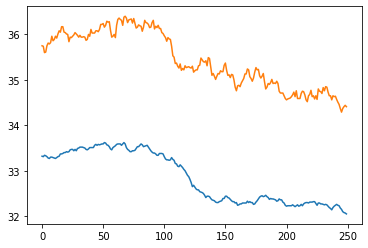

9 40


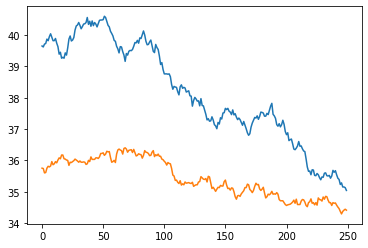

13 20


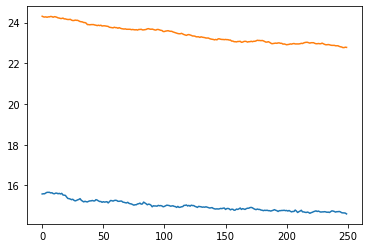

13 27


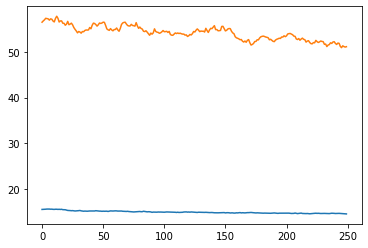

13 40


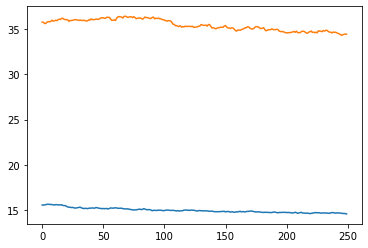

17 23


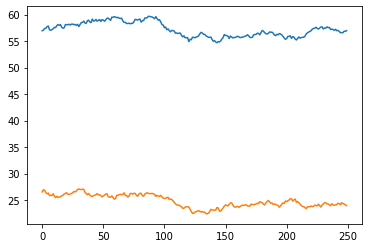

17 31


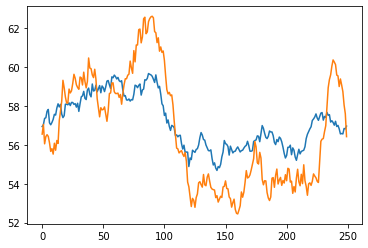

18 21


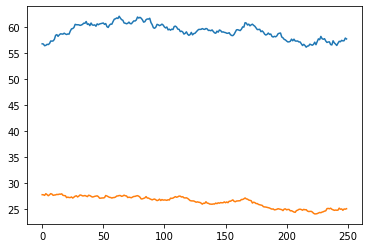

18 40


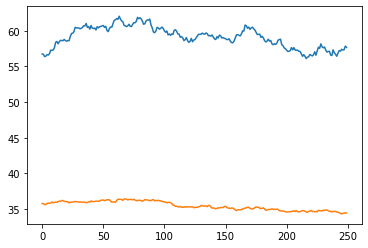

18 41


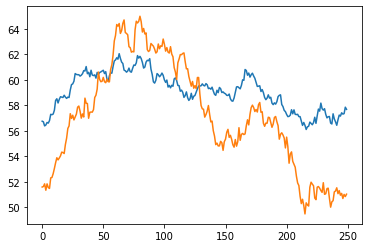

20 24


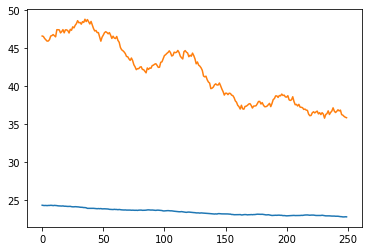

20 41


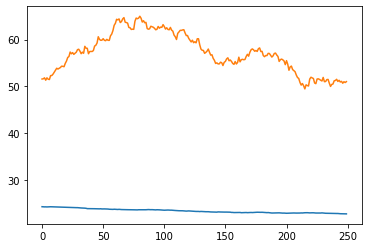

23 26


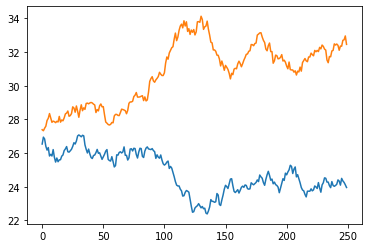

23 46


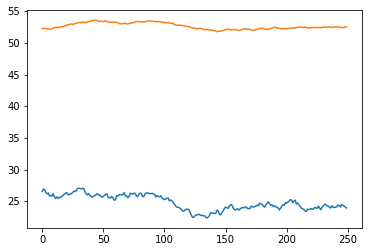

24 38


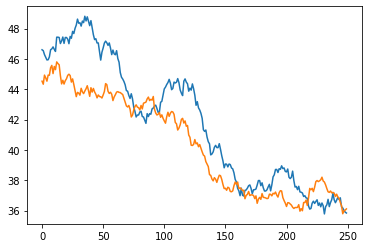

25 43


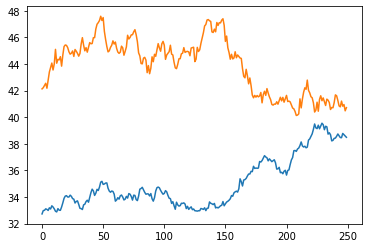

27 34


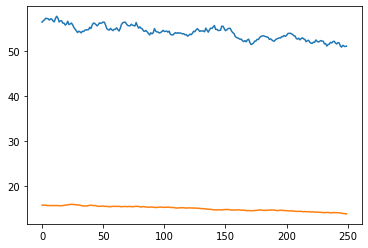

27 43


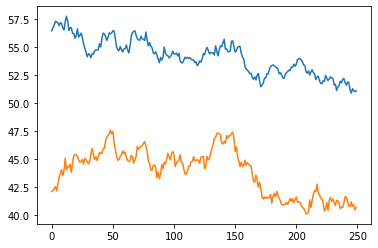

27 44


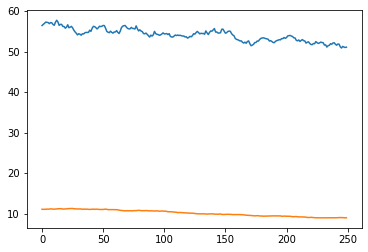

31 46


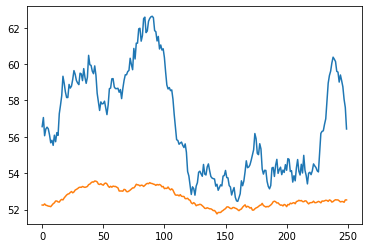

37 40


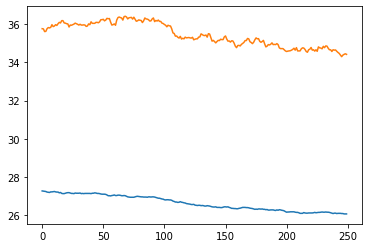

37 44


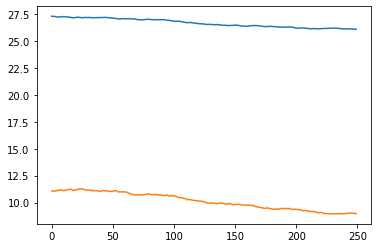

39 47


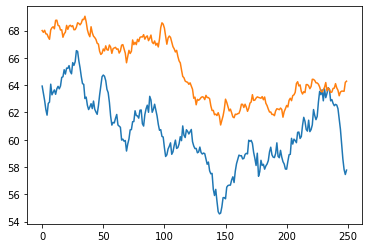

In [22]:
for ([stock_i, stock_j], outcome) in colint_stock_list:
    stock_i_df = data[data['stock'] == stock_i]
    stock_j_df = data[data['stock'] == stock_j]

    print(stock_i, stock_j)

    plt.plot(stock_i_df['date'], stock_i_df['closePrice'], label=stock_i)
    plt.plot(stock_j_df['date'], stock_j_df['closePrice'], label=stock_j)
    plt.show()


In [13]:
colint_stock_list_ct = []

for stock_i in range(50):

    stock_i_df = data[data['stock'] == stock_i]

    for stock_j in range(stock_i+1, 50):
        
        stock_j_df = data[data['stock'] == stock_j]

        outcome = coint(stock_i_df['closePrice'], stock_j_df['closePrice'], trend = 'ct')

        if outcome[1] < 0.05:
            colint_stock_list_ct.append(([stock_i, stock_j], outcome))
            print(stock_i, stock_j)


8 22
8 26
12 30
13 18
13 20
13 29
13 34
13 41
13 43
13 48
15 32
15 38
17 37
19 30
20 39
22 23
24 38
25 28
27 30
27 37
27 38
27 39
27 46
27 47
31 37
31 46
32 38
34 36
34 48
36 41
36 42
36 48
44 46


In [16]:
len(colint_stock_list_ct)

33

8 22


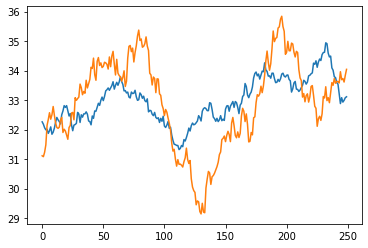

8 26


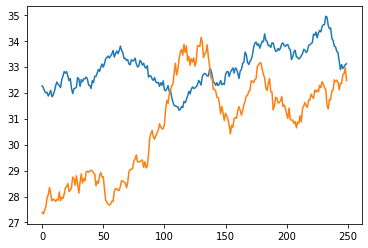

12 30


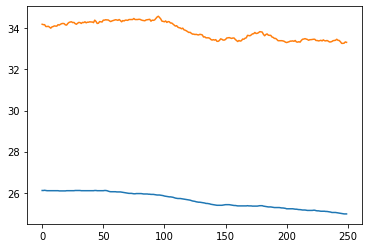

13 18


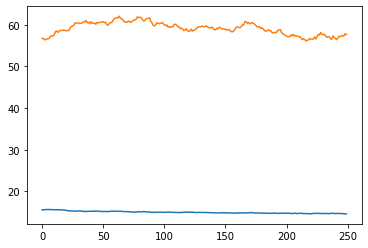

13 20


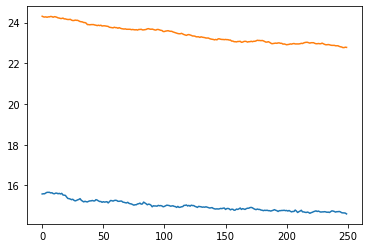

13 29


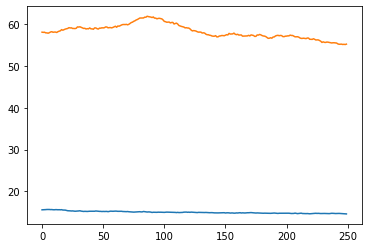

13 34


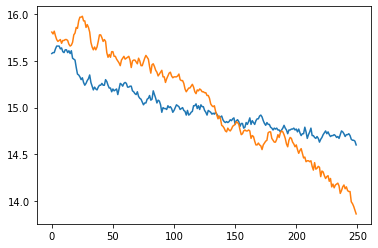

13 41


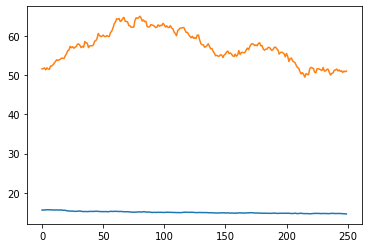

13 43


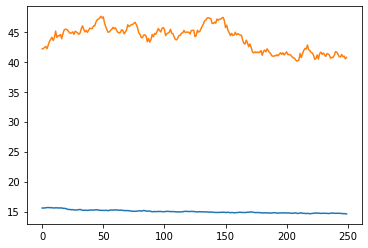

13 48


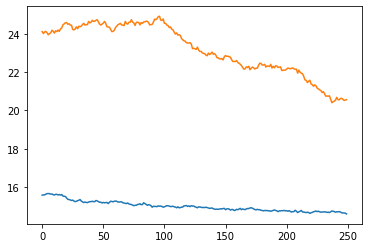

15 32


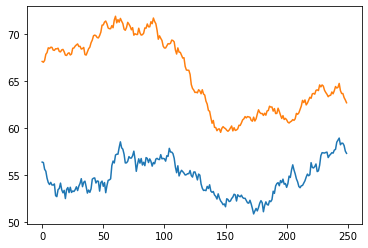

15 38


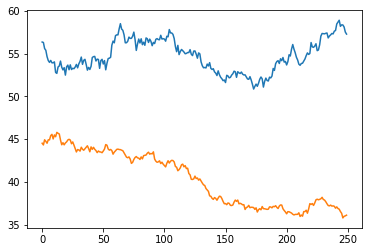

17 37


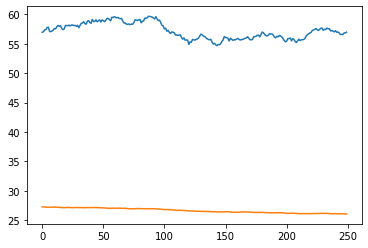

19 30


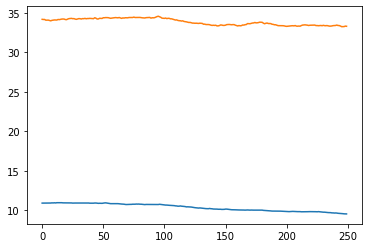

20 39


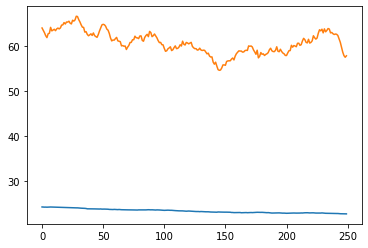

22 23


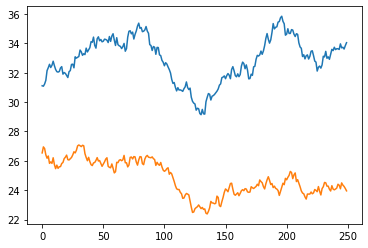

24 38


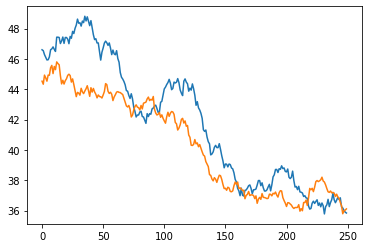

25 28


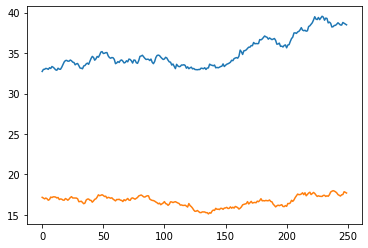

27 30


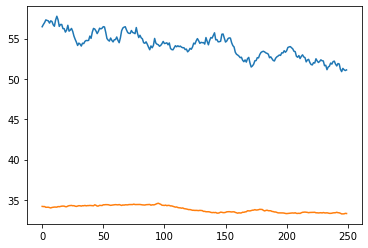

27 37


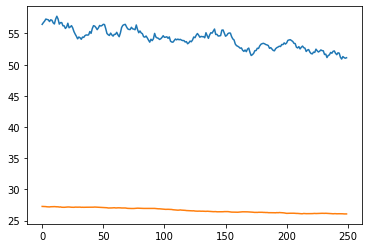

27 38


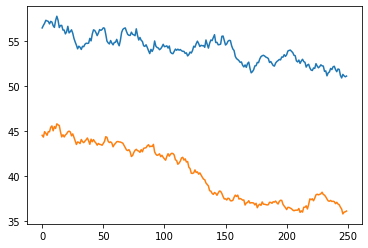

27 39


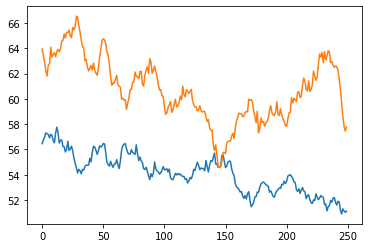

27 46


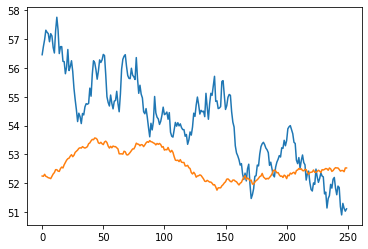

27 47


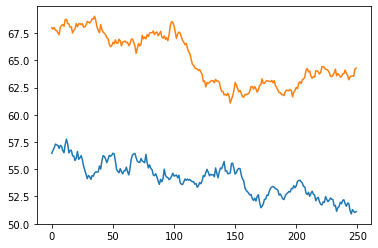

31 37


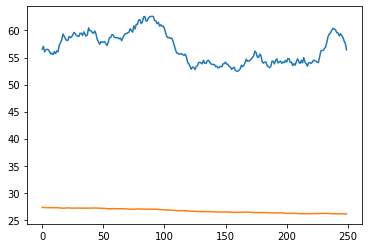

31 46


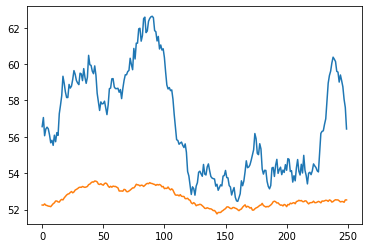

32 38


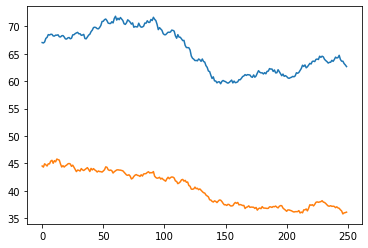

34 36


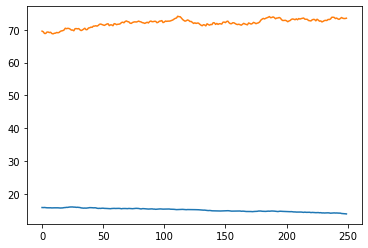

34 48


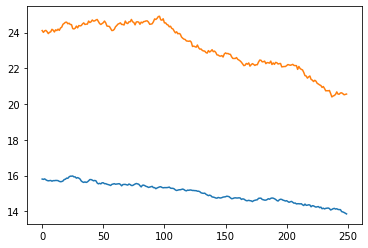

36 41


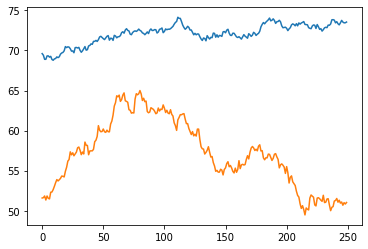

36 42


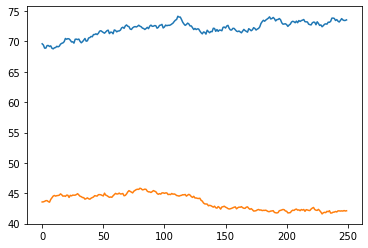

36 48


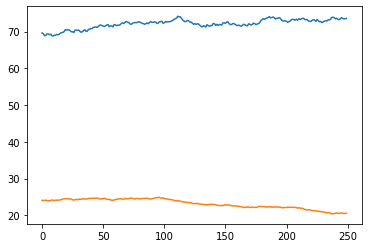

44 46


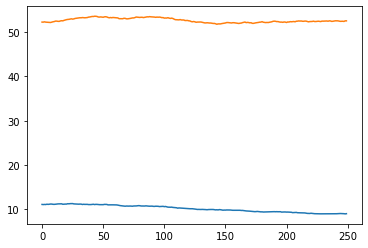

In [21]:
for ([stock_i, stock_j], outcome) in colint_stock_list_ct:
    stock_i_df = data[data['stock'] == stock_i]
    stock_j_df = data[data['stock'] == stock_j]

    print(stock_i, stock_j)

    plt.plot(stock_i_df['date'], stock_i_df['closePrice'], label=stock_i)
    plt.plot(stock_j_df['date'], stock_j_df['closePrice'], label=stock_j)
    plt.show()
